In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2optional.csv'
df = pd.read_csv(url)

# df = pd.read_csv('Exercise2BusData.csv')
df.head(40)

,Arrival_time,Stop_id,Bus_id,Line_id,Arrival_delay,Dwell_time,Scheduled_travel_time,Upstream_stop_delay,Recurrent_delay
0,01/05/2022 07:06,10261,44417,3,69,0,82,33,99.925373
1,01/05/2022 07:20,10261,45544,3,35,0,82,52,100.191176
2,01/05/2022 07:35,10261,44410,3,7,0,82,10,99.681159
3,01/05/2022 07:51,10261,41724,3,74,15,82,27,99.385714
4,01/05/2022 20:16,10261,45544,3,-3,0,109,17,116.298507
5,01/05/2022 20:46,10261,44413,3,-17,0,109,-15,115.550725
6,01/05/2022 21:02,10261,45540,3,37,0,109,46,115.428571
7,01/05/2022 21:17,10261,41724,3,0,26,109,16,108.761194
8,01/05/2022 21:31,10261,44417,3,-6,14,109,-36,108.147059
9,01/05/2022 21:46,10261,45544,3,-39,0,109,-18,108.391304


In [ ]:
df.shape

(4962, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4962 entries, 0 to 4961
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Arrival_time           4962 non-null   object 
 1   Stop_id                4962 non-null   int64  
 2   Bus_id                 4962 non-null   int64  
 3   Line_id                4962 non-null   int64  
 4   Arrival_delay          4962 non-null   int64  
 5   Dwell_time             4962 non-null   int64  
 6   Scheduled_travel_time  4962 non-null   int64  
 7   Upstream_stop_delay    4962 non-null   int64  
 8   Recurrent_delay        4962 non-null   float64
dtypes: float64(1), int64(7), object(1)
memory usage: 349.0+ KB


In [ ]:
df = df.iloc[:1000]

In [ ]:
df = df.drop(['Arrival_time','Stop_id','Bus_id','Line_id'], axis=1)

<Axes: xlabel='Arrival_delay', ylabel='Count'>

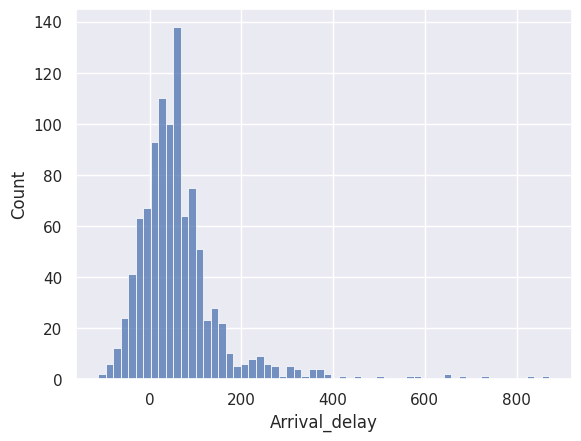

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.histplot(x=df['Arrival_delay'])

In [ ]:
corr_matrix = df.corr()
corr_matrix['Arrival_delay'].sort_values(ascending=False)

,Arrival_delay
Arrival_delay,1.000000
Upstream_stop_delay,0.910405
Dwell_time,0.143519
Recurrent_delay,-0.021810
Scheduled_travel_time,-0.180646


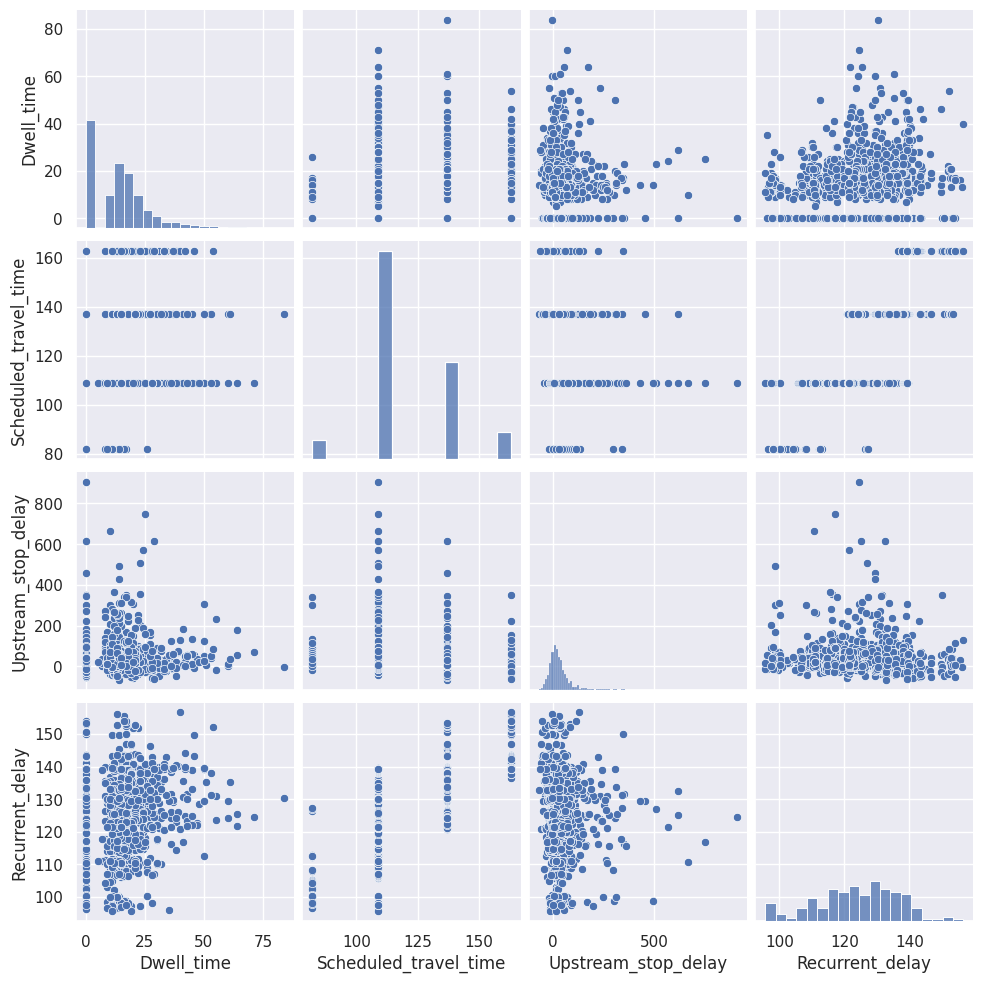

In [ ]:
x = df.drop(['Arrival_delay'], axis=1)
y = df['Arrival_delay']

sns.pairplot(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the test data with the fitted model
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 27.21289652419807
Mean Squared Error: 1369.2194384581421
R-squared: 0.8839446895584742


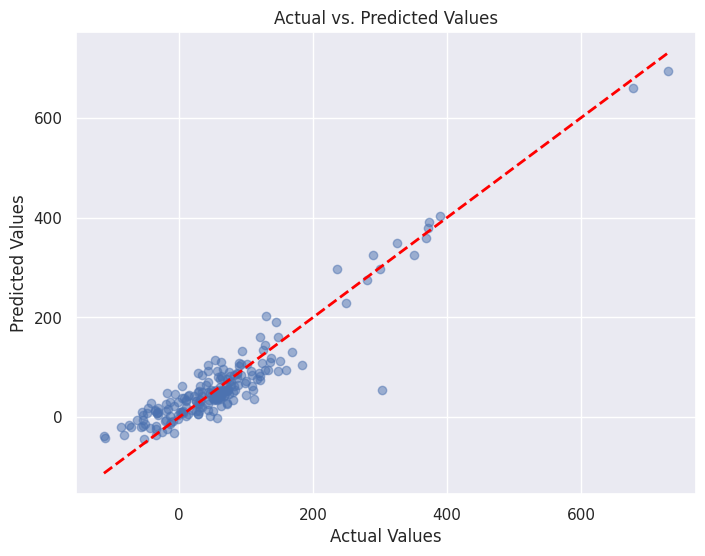

In [ ]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()